In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
sheet1 = pd.read_excel('Inventory Data.xlsx',sheet_name = 'Past Orders')
sheet1

,Order Date,SKU ID,Order Quantity
0,2019-11-19,3084CA,1.000000
1,2019-06-30,2621AA,20.000000
2,2020-04-19,1193BA,147.000000
3,2020-05-21,1971AA,10.000000
4,2019-03-31,3177CA,56.250000
...,...,...,...
33596,2019-09-19,1308BA,3.431150
33597,2020-06-07,1296CA,6.913646
33598,2020-01-02,1295CA,1.142770
33599,2020-05-20,1283CA,0.619023


In [4]:
sheet2 = pd.read_excel('Inventory Data.xlsx' , sheet_name = 'Stock')
sheet2

,SKU ID,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000
...,...,...,...,...,...,...
298,3579CA,116.0,Kg,120,187,86.65000
299,3590BA,145.0,Kg,120,160,115.08500
300,3610AA,275.0,Kg,120,188,156.16000
301,3616CA,331.0,Kg,120,167,433.10000


In [5]:
data=pd.merge(sheet1,sheet2,on='SKU ID',how='outer') # outer is used as we need data of both the sheets .
data 

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,2019-11-19,3084CA,1.0,44.0,Kg,30,45,2769.81
1,2020-04-23,3084CA,1.0,44.0,Kg,30,45,2769.81
2,2019-12-03,3084CA,1.0,44.0,Kg,30,45,2769.81
3,2020-03-24,3084CA,1.0,44.0,Kg,30,45,2769.81
4,2019-03-31,3084CA,2.0,44.0,Kg,30,45,2769.81
...,...,...,...,...,...,...,...,...
33609,NaT,3296AA,NaN,0.0,Kg,30,44,30.00
33610,NaT,3299CA,NaN,0.0,Kg,60,82,30.00
33611,NaT,3300CA,NaN,0.0,Kg,30,42,30.00
33612,NaT,3312AA,NaN,0.0,Kg,60,84,30.00


In [6]:
data.isnull().sum() 

Order Date                  13
SKU ID                       0
Order Quantity              13
Current Stock Quantity       0
1                            0
Average Lead Time (days)     0
Maximum Lead Time (days)     0
Unit Price                   0
dtype: int64

In [7]:
mean_orderdate=data['Order Date'].mean() # order date is filled with average date the orders are made
mean_orderdate

Timestamp('2019-11-20 19:38:09.039016704')

In [8]:
data['Order Date'].fillna(mean_orderdate,inplace=True)

In [9]:
data.isnull().sum()

Order Date                   0
SKU ID                       0
Order Quantity              13
Current Stock Quantity       0
1                            0
Average Lead Time (days)     0
Maximum Lead Time (days)     0
Unit Price                   0
dtype: int64

In [10]:
mean_orderquantity=data['Order Quantity'].mean() #orderquantity is filled with average quantiy of orders and due to less null values
mean_orderquantity

436.7346032534272

In [11]:
data['Order Quantity'].fillna(mean_orderquantity,inplace=True)

In [12]:
data.isnull().sum()

Order Date                  0
SKU ID                      0
Order Quantity              0
Current Stock Quantity      0
1                           0
Average Lead Time (days)    0
Maximum Lead Time (days)    0
Unit Price                  0
dtype: int64

In [13]:
data.describe()

,Order Quantity,Current Stock Quantity,Average Lead Time (days),Maximum Lead Time (days),Unit Price
count,33614.000000,33614.000000,33614.000000,33614.000000,33614.000000
mean,436.734603,6559.541154,49.227405,71.635896,4671.765454
std,2393.329622,21042.264629,29.330274,42.419110,20201.309588
min,0.000015,0.000000,15.000000,20.000000,0.102950
25%,2.000000,17.000000,30.000000,42.000000,30.000000
50%,6.000000,218.000000,45.000000,63.000000,69.456420
75%,38.000000,1565.000000,60.000000,91.000000,722.101000
max,111770.000000,342553.000000,120.000000,192.000000,175000.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33614 entries, 0 to 33613
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order Date                33614 non-null  datetime64[ns]
 1   SKU ID                    33614 non-null  object        
 2   Order Quantity            33614 non-null  float64       
 3   Current Stock Quantity    33614 non-null  float64       
 4   1                         33614 non-null  object        
 5   Average Lead Time (days)  33614 non-null  int64         
 6   Maximum Lead Time (days)  33614 non-null  int64         
 7   Unit Price                33614 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.3+ MB


In [15]:
data.dtypes

Order Date                  datetime64[ns]
SKU ID                              object
Order Quantity                     float64
Current Stock Quantity             float64
1                                   object
Average Lead Time (days)             int64
Maximum Lead Time (days)             int64
Unit Price                         float64
dtype: object

In [16]:
data.columns

Index([              'Order Date',                   'SKU ID',
                 'Order Quantity',   'Current Stock Quantity',
                                1, 'Average Lead Time (days)',
       'Maximum Lead Time (days)',               'Unit Price'],
      dtype='object')

In [17]:
data.head()

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,2019-11-19,3084CA,1.0,44.0,Kg,30,45,2769.81
1,2020-04-23,3084CA,1.0,44.0,Kg,30,45,2769.81
2,2019-12-03,3084CA,1.0,44.0,Kg,30,45,2769.81
3,2020-03-24,3084CA,1.0,44.0,Kg,30,45,2769.81
4,2019-03-31,3084CA,2.0,44.0,Kg,30,45,2769.81


In [18]:
data.shape

(33614, 8)

In [19]:
data.tail()

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
33609,2019-11-20 19:38:09.039016704,3296AA,436.734603,0.0,Kg,30,44,30.0
33610,2019-11-20 19:38:09.039016704,3299CA,436.734603,0.0,Kg,60,82,30.0
33611,2019-11-20 19:38:09.039016704,3300CA,436.734603,0.0,Kg,30,42,30.0
33612,2019-11-20 19:38:09.039016704,3312AA,436.734603,0.0,Kg,60,84,30.0
33613,2019-11-20 19:38:09.039016704,3332CA,436.734603,0.0,Kg,30,46,30.0


In [20]:
sort=data.sort_values(by='Order Quantity',ascending= False)
sort
sort_order_quantity=sort.head(5)
sort_order_quantity

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
19443,2019-07-21,2418CA,111770.0,120860.0,Kg,60,85,5.80000
12010,2019-08-22,2483BA,88200.0,107097.0,Kg,30,45,1.87500
23291,2019-05-05,2391CA,80574.0,87174.0,Kg,45,67,0.75915
23845,2020-03-17,2473CA,69415.0,73915.0,Kg,60,92,5.95000
11530,2020-01-19,2396CA,62000.0,124908.0,Kg,30,46,0.76460


Text(0.5, 1.0, 'Highest quantity of Orders')

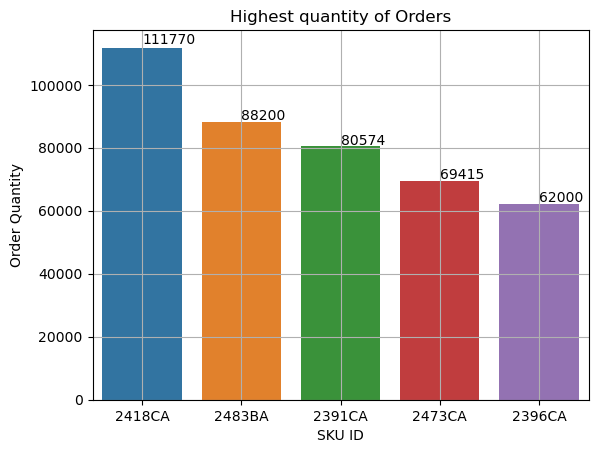

In [21]:
sns.barplot(data=sort_order_quantity,x='SKU ID',y='Order Quantity')
plt.text(0,113000,'111770',c='k')
plt.text(1,89000,'88200',c='k')
plt.text(2,81000,'80574',c='k')
plt.text(3,70000,'69415',c='k')
plt.text(4,63000,'62000',c='k')
plt.grid()
plt.title('Highest quantity of Orders' )

In [22]:
sort1=data.sort_values(by='Current Stock Quantity',ascending= False)
sort_current_stock=sort1.head(30)
sort_current_stock

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
19811,2019-12-29,2429BA,100.0,342553.0,Kg,90,122,5.28688
19817,2019-10-07,2429BA,62.0,342553.0,Kg,90,122,5.28688
19806,2019-07-31,2429BA,6953.0,342553.0,Kg,90,122,5.28688
19807,2019-04-16,2429BA,42.0,342553.0,Kg,90,122,5.28688
19808,2019-09-05,2429BA,100.0,342553.0,Kg,90,122,5.28688
19809,2020-01-21,2429BA,8993.0,342553.0,Kg,90,122,5.28688
19810,2019-04-13,2429BA,4410.0,342553.0,Kg,90,122,5.28688
19812,2020-06-11,2429BA,180.0,342553.0,Kg,90,122,5.28688
19813,2020-01-30,2429BA,100.0,342553.0,Kg,90,122,5.28688
19814,2019-07-12,2429BA,140.0,342553.0,Kg,90,122,5.28688


C:\Users\HP\AppData\Local\Temp\ipykernel_13392\911500886.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sort_current_stock,x='Current Stock Quantity',color='red',shade=True)


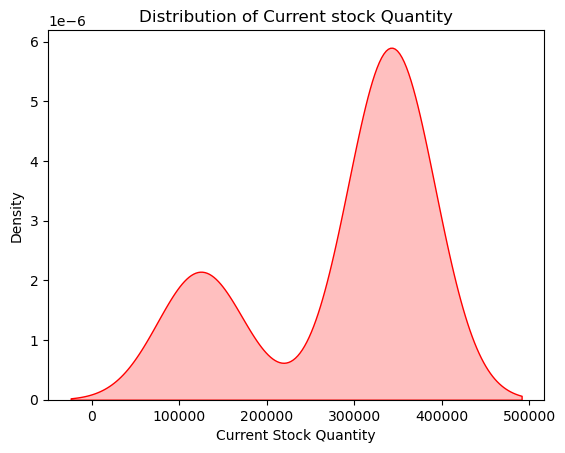

In [23]:
sns.kdeplot(data=sort_current_stock,x='Current Stock Quantity',color='red',shade=True)
plt.title('Distribution of Current stock Quantity')
plt.show()

In [24]:
sort2=data.sort_values(by='Unit Price',ascending=False)
sort_unit_price=sort2.head(200)
sort_unit_price

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
20296,2019-11-28,1295CA,0.786589,5.0,Kg,120,158,175000.0
20277,2019-11-09,1295CA,0.657792,5.0,Kg,120,158,175000.0
20257,2019-11-28,1295CA,1.498862,5.0,Kg,120,158,175000.0
20258,2019-09-26,1295CA,0.615579,5.0,Kg,120,158,175000.0
20259,2019-10-26,1295CA,0.707560,5.0,Kg,120,158,175000.0
...,...,...,...,...,...,...,...,...
23828,2020-05-03,1281BA,0.607420,3.0,Kg,60,85,139500.0
23826,2020-01-11,1281BA,1.428138,3.0,Kg,60,85,139500.0
23843,2020-05-07,1281BA,1.301662,3.0,Kg,60,85,139500.0
23817,2019-11-02,1281BA,0.819258,3.0,Kg,60,85,139500.0


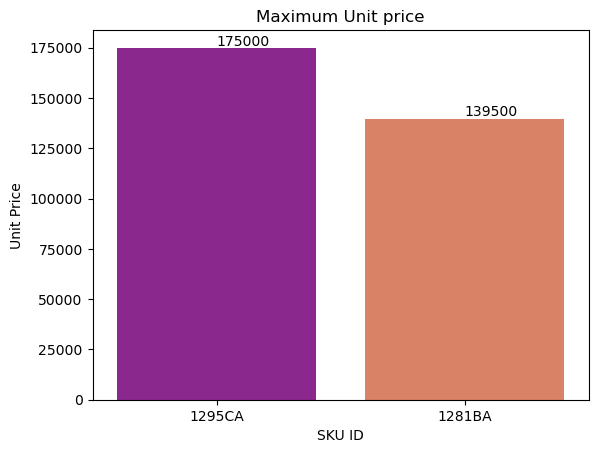

In [25]:
sns.barplot(data=sort_unit_price,x='SKU ID',y='Unit Price',palette='plasma')
plt.text(0,176000,'175000',c='k')
plt.text(1,141000,'139500',c='k')
plt.title('Maximum Unit price')
plt.show()

In [26]:
sort25=data.sort_values(by='Unit Price',ascending= True)
sort_unit_price2=sort25.head(200)
sort_unit_price2

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
1960,2020-03-26,3512AA,1100.0,70141.0,Kg,20,31,0.10295
1986,2019-03-13,3512AA,1000.0,70141.0,Kg,20,31,0.10295
1985,2019-10-07,3512AA,1000.0,70141.0,Kg,20,31,0.10295
1984,2019-12-09,3512AA,200.0,70141.0,Kg,20,31,0.10295
1983,2019-03-18,3512AA,500.0,70141.0,Kg,20,31,0.10295
...,...,...,...,...,...,...,...,...
20403,2020-03-10,1484BA,1.0,439.0,Kg,15,23,0.20000
20405,2019-10-02,1484BA,1.0,439.0,Kg,15,23,0.20000
20398,2020-05-31,1484BA,1.0,439.0,Kg,15,23,0.20000
20407,2019-11-11,1484BA,1.0,439.0,Kg,15,23,0.20000


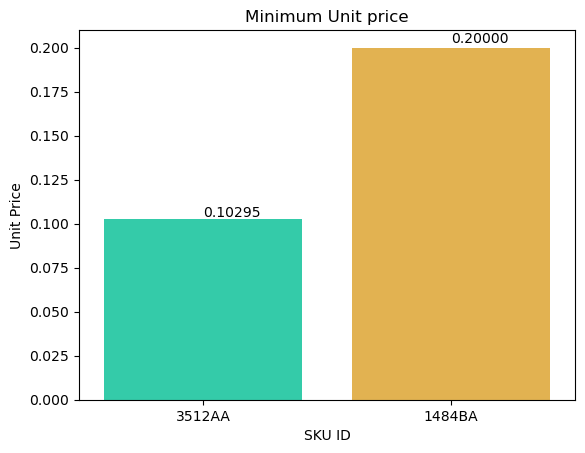

In [27]:
sns.barplot(data=sort_unit_price2,x='SKU ID',y='Unit Price',palette='turbo')
plt.text(0,0.10400,'0.10295',c='k')
plt.text(1,0.20300,'0.20000',c='k')
plt.title('Minimum Unit price')
plt.show()

In [28]:
sort3=data.sort_values(by='Maximum Lead Time (days)',ascending=False)
sort_maxlead=sort3.head(800)
sort_maxlead

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
28032,2019-10-19,2143AA,9.312897,196.0,Kg,120,192,30.00000
27922,2020-01-28,2143AA,3.072987,196.0,Kg,120,192,30.00000
8852,2019-08-23,2229AA,7.000000,48.0,Kg,120,192,1054.24333
8851,2020-02-02,2229AA,2.000000,48.0,Kg,120,192,1054.24333
8850,2019-12-03,2229AA,2.000000,48.0,Kg,120,192,1054.24333
...,...,...,...,...,...,...,...,...
5941,2020-02-18,2315BA,100.000000,734.0,Kg,120,182,14.92220
5952,2019-05-25,2315BA,90.000000,734.0,Kg,120,182,14.92220
5954,2019-02-02,2315BA,6.000000,734.0,Kg,120,182,14.92220
5955,2020-02-07,2315BA,6.000000,734.0,Kg,120,182,14.92220


C:\Users\HP\AppData\Local\Temp\ipykernel_13392\3088828188.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sort_maxlead['Maximum Lead Time (days)'])


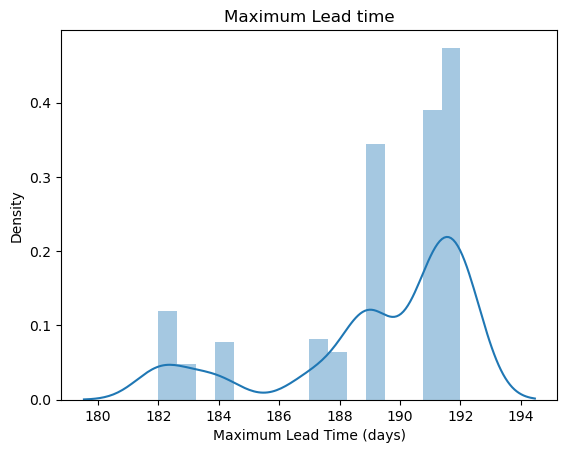

In [29]:
sns.distplot(sort_maxlead['Maximum Lead Time (days)'])
plt.title('Maximum Lead time')
plt.show()

In [30]:
data

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,2019-11-19 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81
1,2020-04-23 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81
2,2019-12-03 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81
3,2020-03-24 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81
4,2019-03-31 00:00:00.000000000,3084CA,2.000000,44.0,Kg,30,45,2769.81
...,...,...,...,...,...,...,...,...
33609,2019-11-20 19:38:09.039016704,3296AA,436.734603,0.0,Kg,30,44,30.00
33610,2019-11-20 19:38:09.039016704,3299CA,436.734603,0.0,Kg,60,82,30.00
33611,2019-11-20 19:38:09.039016704,3300CA,436.734603,0.0,Kg,30,42,30.00
33612,2019-11-20 19:38:09.039016704,3312AA,436.734603,0.0,Kg,60,84,30.00


In [31]:
import datetime

In [32]:
year=data['Order Date'].dt.year
data['year']=year
data

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year
0,2019-11-19 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019
1,2020-04-23 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020
2,2019-12-03 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019
3,2020-03-24 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020
4,2019-03-31 00:00:00.000000000,3084CA,2.000000,44.0,Kg,30,45,2769.81,2019
...,...,...,...,...,...,...,...,...,...
33609,2019-11-20 19:38:09.039016704,3296AA,436.734603,0.0,Kg,30,44,30.00,2019
33610,2019-11-20 19:38:09.039016704,3299CA,436.734603,0.0,Kg,60,82,30.00,2019
33611,2019-11-20 19:38:09.039016704,3300CA,436.734603,0.0,Kg,30,42,30.00,2019
33612,2019-11-20 19:38:09.039016704,3312AA,436.734603,0.0,Kg,60,84,30.00,2019


In [33]:
month=data['Order Date'].dt.month
data['month']=month
data

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year,month
0,2019-11-19 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,11
1,2020-04-23 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020,4
2,2019-12-03 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,12
3,2020-03-24 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020,3
4,2019-03-31 00:00:00.000000000,3084CA,2.000000,44.0,Kg,30,45,2769.81,2019,3
...,...,...,...,...,...,...,...,...,...,...
33609,2019-11-20 19:38:09.039016704,3296AA,436.734603,0.0,Kg,30,44,30.00,2019,11
33610,2019-11-20 19:38:09.039016704,3299CA,436.734603,0.0,Kg,60,82,30.00,2019,11
33611,2019-11-20 19:38:09.039016704,3300CA,436.734603,0.0,Kg,30,42,30.00,2019,11
33612,2019-11-20 19:38:09.039016704,3312AA,436.734603,0.0,Kg,60,84,30.00,2019,11


In [34]:
data

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year,month
0,2019-11-19 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,11
1,2020-04-23 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020,4
2,2019-12-03 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,12
3,2020-03-24 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020,3
4,2019-03-31 00:00:00.000000000,3084CA,2.000000,44.0,Kg,30,45,2769.81,2019,3
...,...,...,...,...,...,...,...,...,...,...
33609,2019-11-20 19:38:09.039016704,3296AA,436.734603,0.0,Kg,30,44,30.00,2019,11
33610,2019-11-20 19:38:09.039016704,3299CA,436.734603,0.0,Kg,60,82,30.00,2019,11
33611,2019-11-20 19:38:09.039016704,3300CA,436.734603,0.0,Kg,30,42,30.00,2019,11
33612,2019-11-20 19:38:09.039016704,3312AA,436.734603,0.0,Kg,60,84,30.00,2019,11


In [35]:
group1=data.groupby(year)
group1.groups

{2019: [0, 2, 4, 9, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 62, 63, 67, 68, 69, 71, 72, 73, 76, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 97, 100, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 130, 133, 134, 136, 137, 139, 140, 141, 143, 146, 147, 148, 150, 151, 152, ...], 2020: [1, 3, 5, 6, 7, 8, 10, 19, 20, 28, 32, 33, 39, 43, 44, 49, 54, 60, 61, 64, 65, 66, 70, 74, 75, 77, 78, 79, 80, 81, 87, 93, 96, 98, 99, 101, 103, 112, 119, 124, 125, 126, 127, 128, 129, 131, 132, 135, 138, 142, 144, 145, 149, 153, 156, 161, 163, 164, 166, 168, 169, 171, 172, 174, 175, 176, 178, 179, 180, 181, 183, 184, 188, 191, 195, 198, 204, 205, 208, 214, 216, 221, 224, 227, 228, 232, 240, 241, 248, 250, 251, 253, 255, 256, 257, 259, 262, 263, 266, 267, ...]}

In [36]:
group1

In [37]:
group1.get_group(2019)

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year,month
0,2019-11-19 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,11
2,2019-12-03 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,12
4,2019-03-31 00:00:00.000000000,3084CA,2.000000,44.0,Kg,30,45,2769.81,2019,3
9,2019-12-30 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,12
11,2019-12-16 00:00:00.000000000,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019,12
...,...,...,...,...,...,...,...,...,...,...
33609,2019-11-20 19:38:09.039016704,3296AA,436.734603,0.0,Kg,30,44,30.00,2019,11
33610,2019-11-20 19:38:09.039016704,3299CA,436.734603,0.0,Kg,60,82,30.00,2019,11
33611,2019-11-20 19:38:09.039016704,3300CA,436.734603,0.0,Kg,30,42,30.00,2019,11
33612,2019-11-20 19:38:09.039016704,3312AA,436.734603,0.0,Kg,60,84,30.00,2019,11


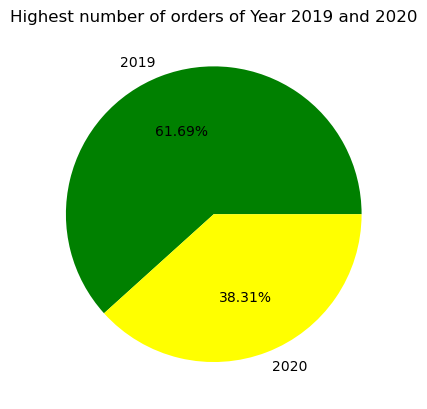

In [38]:
max1=data.groupby('year')['Order Quantity'].max()
max1= data.groupby('year')['Order Quantity'].max()
plt.pie(max1, labels=max1.index, autopct='%0.2f%%',colors=['green','yellow'])
plt.title('Highest number of orders of Year 2019 and 2020')
plt.show()

In [39]:
sort1=data.sort_values(by='Current Stock Quantity',ascending=False)
sort_current_stock=sort1.head(100)
sort_current_stock

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year,month
19811,2019-12-29,2429BA,100.00000,342553.0,Kg,90,122,5.28688,2019,12
19817,2019-10-07,2429BA,62.00000,342553.0,Kg,90,122,5.28688,2019,10
19806,2019-07-31,2429BA,6953.00000,342553.0,Kg,90,122,5.28688,2019,7
19807,2019-04-16,2429BA,42.00000,342553.0,Kg,90,122,5.28688,2019,4
19808,2019-09-05,2429BA,100.00000,342553.0,Kg,90,122,5.28688,2019,9
...,...,...,...,...,...,...,...,...,...,...
11513,2020-01-10,2396CA,60.00000,124908.0,Kg,30,46,0.76460,2020,1
11514,2019-11-26,2396CA,604.00000,124908.0,Kg,30,46,0.76460,2019,11
11515,2019-12-15,2396CA,2717.00000,124908.0,Kg,30,46,0.76460,2019,12
11497,2019-08-11,2396CA,500.00000,124908.0,Kg,30,46,0.76460,2019,8


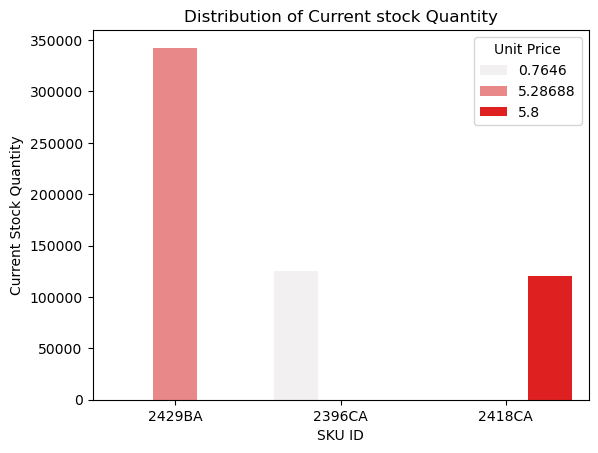

In [40]:
sns.barplot(data=sort_current_stock,x='SKU ID',y='Current Stock Quantity',color='red',hue='Unit Price')
plt.title('Distribution of Current stock Quantity')
plt.show()

In [116]:
sort1=data.sort_values(by='Current Stock Quantity',ascending=False)
sort_current_stock=sort1.head(350)
sort_current_stock

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year,month
19811,2019-12-29,2429BA,100.000000,342553.0,Kg,90,122,5.28688,2019,12
19817,2019-10-07,2429BA,62.000000,342553.0,Kg,90,122,5.28688,2019,10
19806,2019-07-31,2429BA,6953.000000,342553.0,Kg,90,122,5.28688,2019,7
19807,2019-04-16,2429BA,42.000000,342553.0,Kg,90,122,5.28688,2019,4
19808,2019-09-05,2429BA,100.000000,342553.0,Kg,90,122,5.28688,2019,9
...,...,...,...,...,...,...,...,...,...,...
23379,2020-05-19,2391CA,19262.963154,87174.0,Kg,45,67,0.75915,2020,5
23378,2020-04-27,2391CA,21814.479854,87174.0,Kg,45,67,0.75915,2020,4
23377,2019-10-07,2391CA,30950.998567,87174.0,Kg,45,67,0.75915,2019,10
23376,2019-10-24,2391CA,14054.045270,87174.0,Kg,45,67,0.75915,2019,10


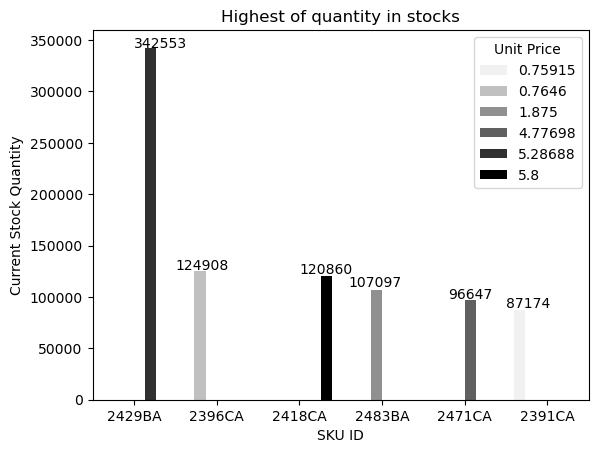

In [117]:
sns.barplot(data=sort_current_stock,x='SKU ID',y='Current Stock Quantity',color='k',hue='Unit Price')
plt.title('Highest of quantity in stocks')
plt.text(0,342650,'342553',c='k')
plt.text(0.5,126000,'124908',c='k')
plt.text(2,123000,'120860',c='k')
plt.text(2.6,110000,'107097',c='k')
plt.text(3.8,97900,'96647',c='k')
plt.text(4.5,89000,'87174',c='k')
plt.show()

In [118]:
max1=data.groupby('year')['Order Quantity'].max().reset_index()
max1

,year,Order Quantity
0,2019,111770.0
1,2020,69415.0


In [119]:
sort1=data.sort_values(by='Current Stock Quantity',ascending=False)
sort_current_stock=sort1.head(30)
sort_current_stock

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,1,Average Lead Time (days),Maximum Lead Time (days),Unit Price,year,month
19811,2019-12-29,2429BA,100.0,342553.0,Kg,90,122,5.28688,2019,12
19817,2019-10-07,2429BA,62.0,342553.0,Kg,90,122,5.28688,2019,10
19806,2019-07-31,2429BA,6953.0,342553.0,Kg,90,122,5.28688,2019,7
19807,2019-04-16,2429BA,42.0,342553.0,Kg,90,122,5.28688,2019,4
19808,2019-09-05,2429BA,100.0,342553.0,Kg,90,122,5.28688,2019,9
19809,2020-01-21,2429BA,8993.0,342553.0,Kg,90,122,5.28688,2020,1
19810,2019-04-13,2429BA,4410.0,342553.0,Kg,90,122,5.28688,2019,4
19812,2020-06-11,2429BA,180.0,342553.0,Kg,90,122,5.28688,2020,6
19813,2020-01-30,2429BA,100.0,342553.0,Kg,90,122,5.28688,2020,1
19814,2019-07-12,2429BA,140.0,342553.0,Kg,90,122,5.28688,2019,7


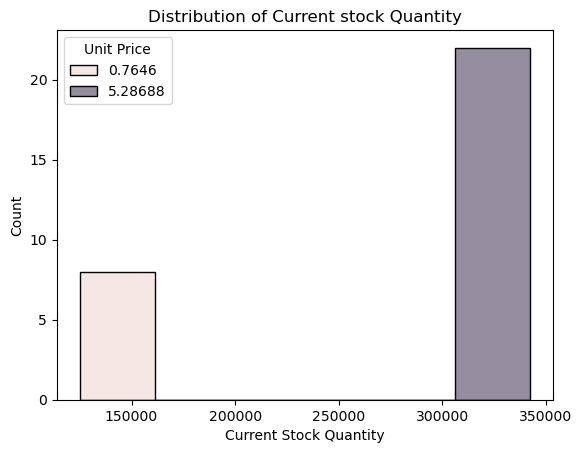

In [120]:
sns.histplot(data=sort_current_stock,x='Current Stock Quantity',color='turquoise',hue='Unit Price')
plt.title('Distribution of Current stock Quantity')
plt.show()

In [56]:
import os
import pandas as pd
directory_path = 'D:\\FIREBLAZE\\Python Internship'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
csv_file_path = os.path.join(directory_path, 'Cleaned inventory data.csv')
data.to_csv(csv_file_path, index=False)

print(f"Cleaned DataFrame has been saved to {csv_file_path}")


Cleaned DataFrame has been saved to D:\FIREBLAZE\Python Internship\Cleaned inventory data.csv
